In [10]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from skimage import io
from skimage import exposure
import skimage as skm
from skimage import exposure, img_as_float

In [11]:
image1 = io.imread('E:/Landsat8/Blue.tif')
image2 = io.imread('E:/Landsat8/Green.tif')
image3 = io.imread('E:/Landsat8/Red.tif')
image4 = io.imread('E:/Landsat8//NIR.tif')
image5 = io.imread('E:/Landsat8/SWIR1.tif')
image6 = io.imread('E:/Landsat8/SWIR2.tif')

In [12]:
B1 = np.array(image1).astype(float)
B2 = np.array(image2).astype(float)
B3 = np.array(image3).astype(float)
B4 = np.array(image4).astype(float)
B5 = np.array(image5).astype(float)
B6 = np.array(image6).astype(float)

In [13]:
NB1 = (B1-np.min(B1))/(np.max(B1)-np.min(B1))
NB2 = (B2-np.min(B2))/(np.max(B2)-np.min(B2))
NB3 = (B3-np.min(B3))/(np.max(B3)-np.min(B3))
NB4 = (B4-np.min(B4))/(np.max(B4)-np.min(B4))
NB5 = (B5-np.min(B5))/(np.max(B5)-np.min(B5))
NB6 = (B6-np.min(B6))/(np.max(B6)-np.min(B6))

Normalized difference vegetation index

In [14]:
NDVI = (NB4-NB3)/(NB4+NB3)

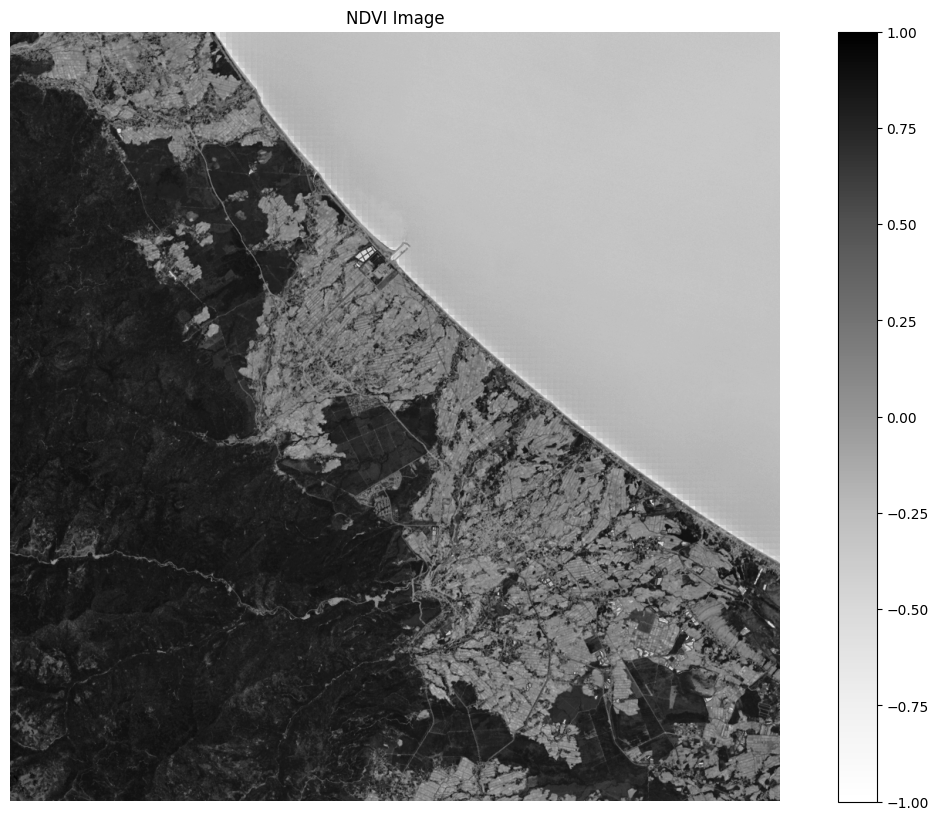

In [15]:
plt.figure(figsize=(15,10))
plt.imshow(NDVI, cmap=cm.Greys)
plt.title('NDVI Image')
plt.colorbar()
plt.axis('off')
plt.show()

In [34]:
NDWI = (NB2 - NB4)/(NB2 + NB4)

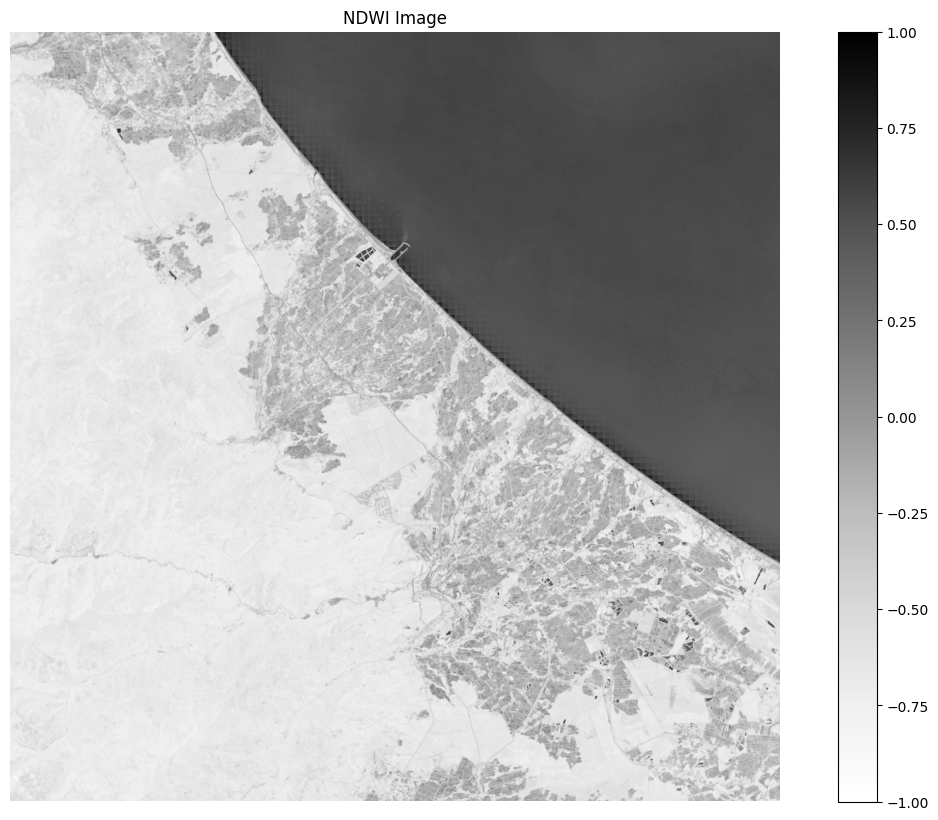

In [35]:
plt.figure(figsize=(15,10))
plt.imshow(NDWI, cmap=cm.Greys)
plt.title('NDWI Image')
plt.colorbar()
plt.axis('off')
plt.show()

In [50]:
SAVI = ((NB4-NB3)/(NB4+NB3+0.5))*(1+0.5)

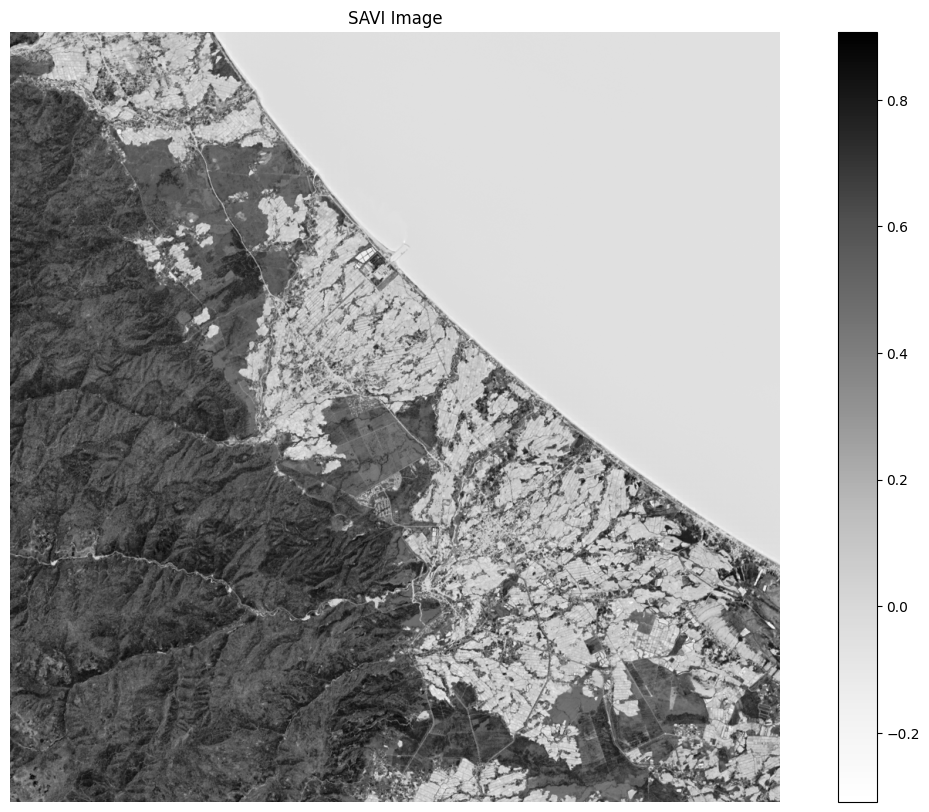

In [52]:
plt.figure(figsize=(15,10))
plt.imshow(SAVI, cmap=cm.Greys)
plt.title('SAVI Image')
plt.colorbar()
plt.axis('off')
plt.show()

In [69]:
UI = (NB6 - NB4)/(NB6 + NB4)

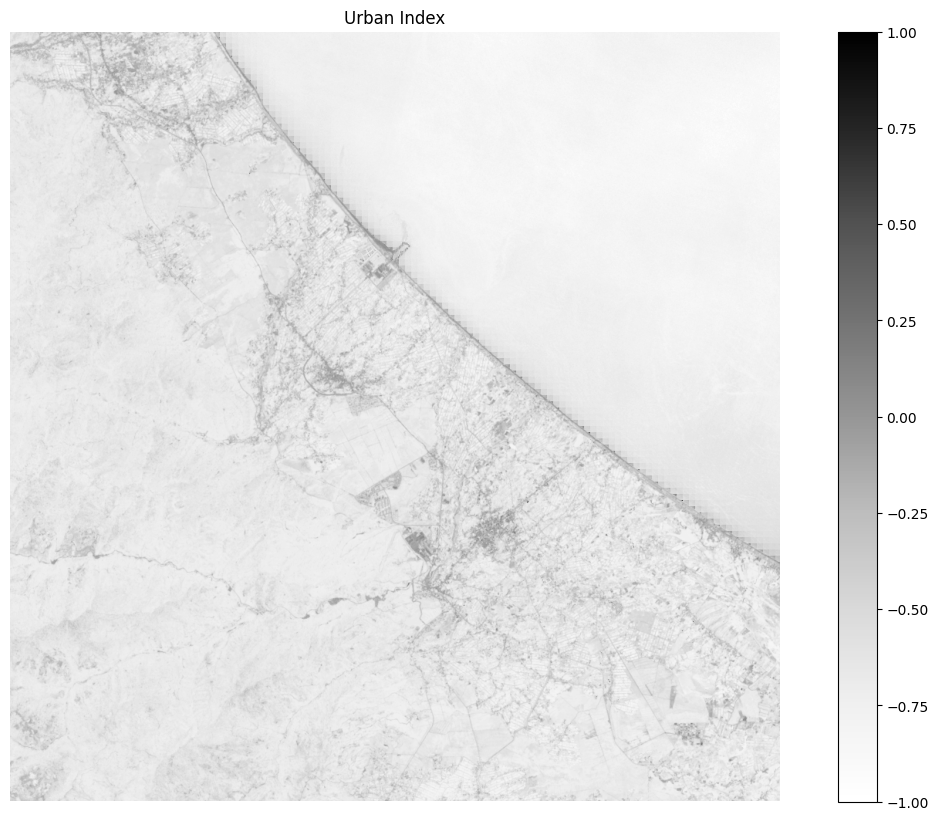

In [70]:
plt.figure(figsize=(15,10))
plt.imshow(UI, cmap=cm.Greys)
plt.title('Urban Index')
plt.colorbar()
plt.axis('off')
plt.show()

In [29]:
lai = 0.68

In [30]:
veg = NDVI > lai
non_veg = NDVI <= lai

In [46]:
water = 0.2

In [47]:
watero = NDWI > water
non_watero = NDWI <= water

In [65]:
soilveg = 0.44

In [66]:
soil = SAVI > soilveg
non_soil = SAVI <= soilveg

In [84]:
urbaniz = -0.28

In [85]:
urban = UI > urbaniz
non_urban = UI <= urbaniz

In [63]:
GEnNB1 = exposure.adjust_gamma(NB1 , gamma=0.5, gain=1)
GEnNB2 = exposure.adjust_gamma(NB2 , gamma=0.5, gain=1)
GEnNB3 = exposure.adjust_gamma(NB3 , gamma=0.5, gain=1)
GNstack = np.stack([GEnNB3,GEnNB2,GEnNB1], axis=2)

In [96]:
rgb = np.stack([NB3,NB2,NB1], axis=2)

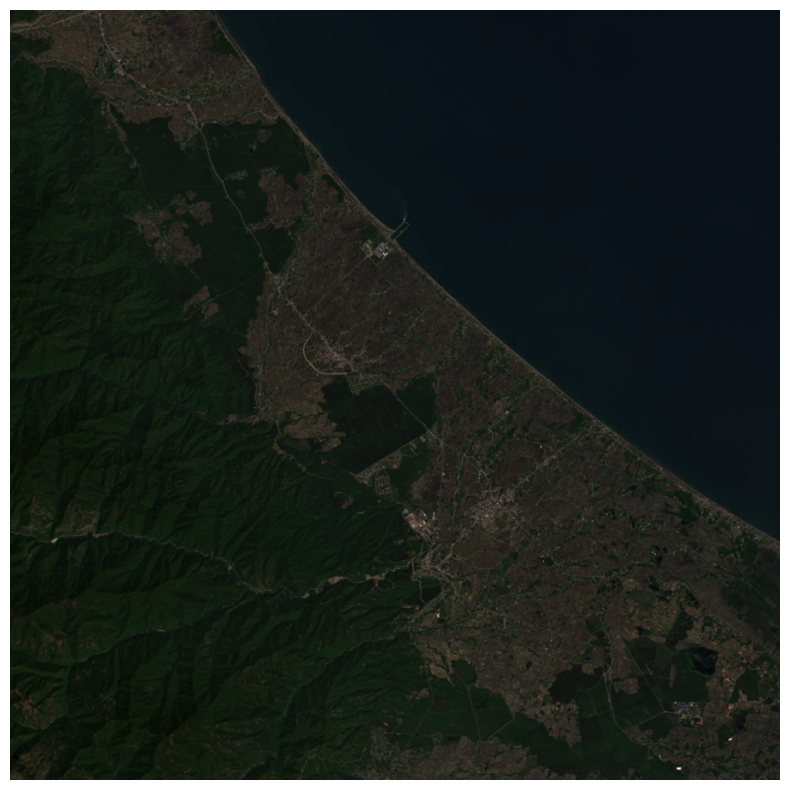

In [98]:
plt.figure(figsize=(15,10))
plt.imshow(rgb)
plt.axis('off')
plt.show()

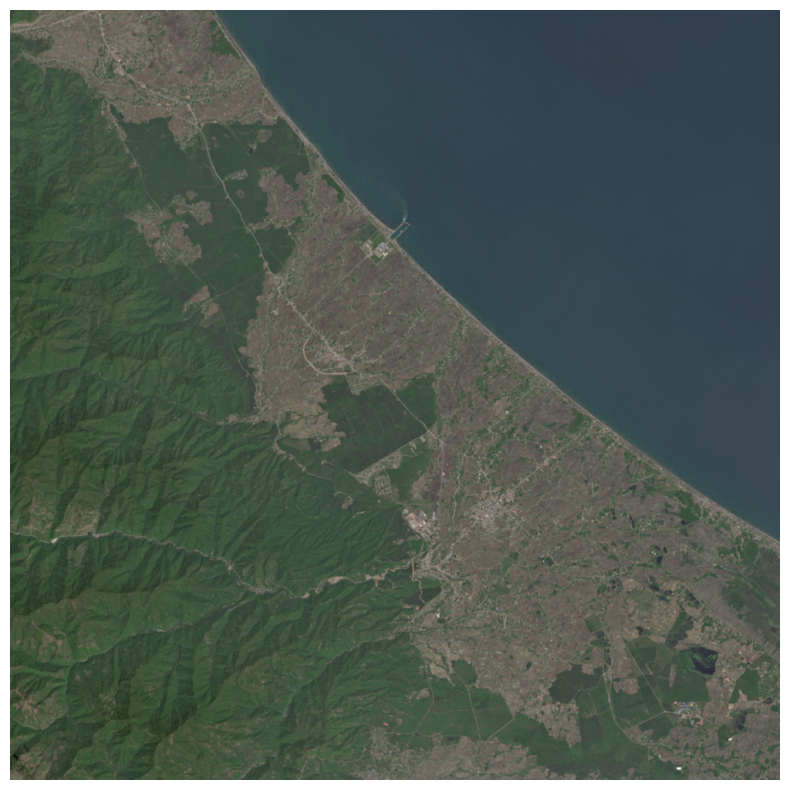

In [99]:
plt.figure(figsize=(15,10))
plt.imshow(GNstack)
plt.axis('off')
plt.show()

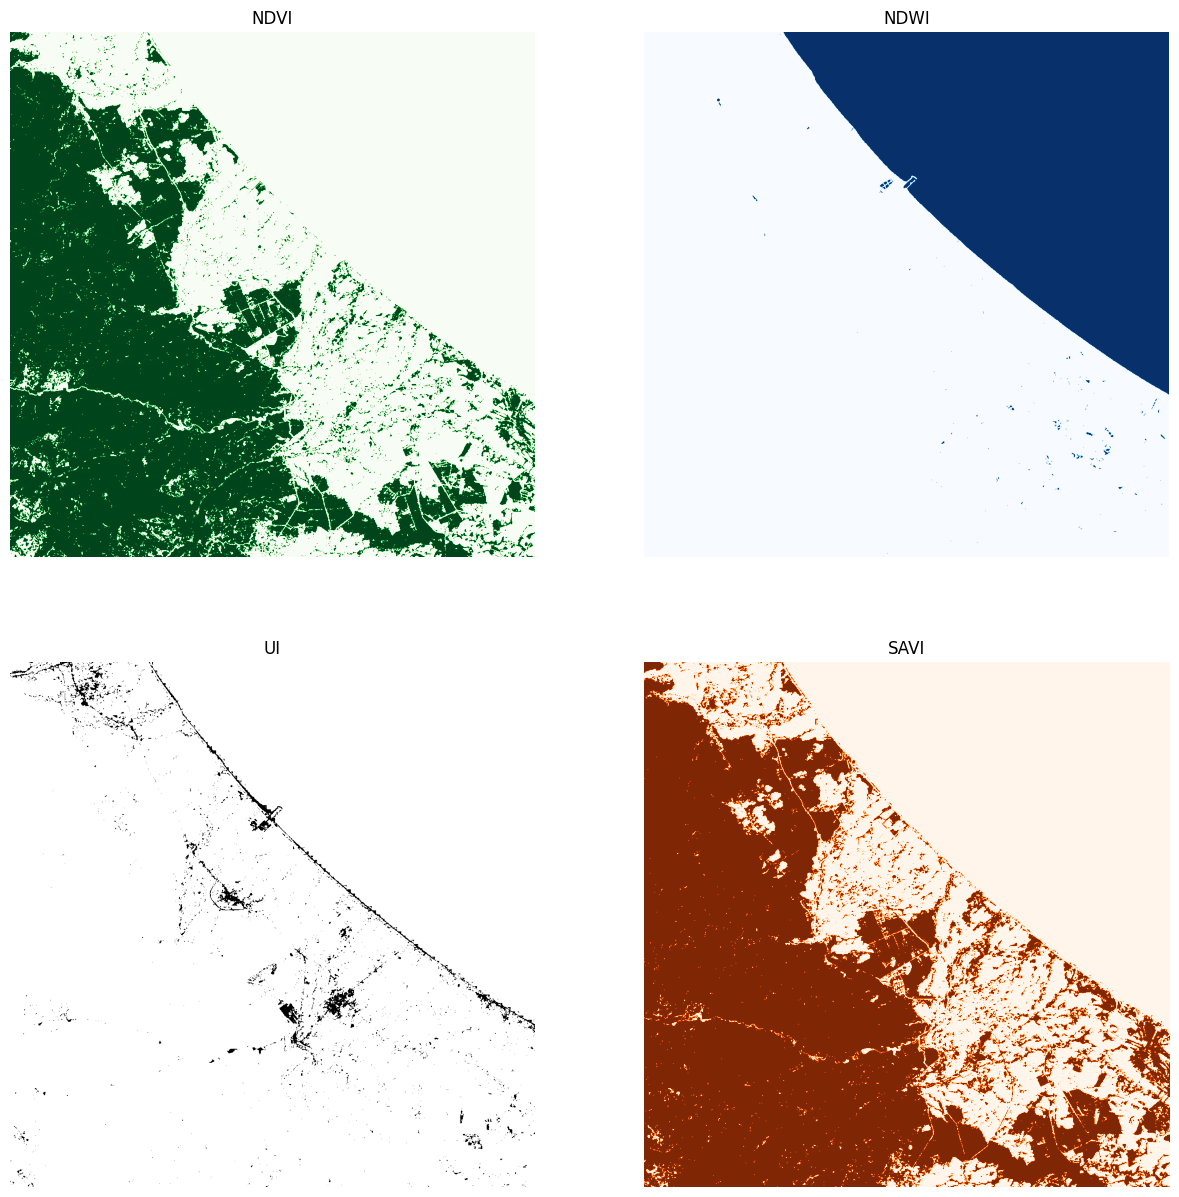

In [88]:
fig , ax = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
ax[0,0].imshow(veg, cmap=cm.Greens)
ax[0,0].set_title('NDVI')
ax[0,0].axis('off')
######
ax[0,1].imshow(watero, cmap=cm.Blues)
ax[0,1].set_title('NDWI')
ax[0,1].axis('off')
######
ax[1,0].imshow(urban, cmap=cm.Greys)
ax[1,0].set_title('UI')
ax[1,0].axis('off')
######
ax[1,1].imshow(soil, cmap=cm.Oranges)
ax[1,1].set_title('SAVI')
ax[1,1].axis('off')
plt.show()